![alt text](uspas.png)
# Fundamentals of Accelerator Physics and Technology 
### (with Simulations and Measurements Lab)
# Computer Lab: Transverse Dynamics
##### Author: M. Syphers, E. Harms, N. Neveu

This session deals with transverse dynamics in three sections. The first demonstrates the development of a beam envelope by tracking a particle repeatedly through a FODO structure. The second demonstrates the development of ellipses in phase space for the same FODO structure. The third demonstrates a local orbit distortion in a FODO lattice and how to correct it. 

### Python Notes: 
- Press shift+enter to execute a cell, or use the play button at the top of the window
- Make sure you exectue cells in order, or re-exectue cells if you change something at the top of the notebook.
- Repeated variables are appeneded with a number (1,2,3) indicating the section they belong to.
- You can also exectue the whole notebook by using 'Run all cells' under the 'Run' tab.
- '2**2' represents two squared, i.e. 2^2
- A colon (:) means all values in that dimension. i.e. array[:,2] = all rows, second column
- You can change the plot limits by adjusting the numbers in 'ylim()'
----------

## 1. Betatron Oscillation Envelope

For transverse motion of a particle (beam) to be stable, the trace of the 2X2 transport matrix for each degree of freedom (horizontal and vertical) must be less than or equal to 2 in absolute value: |TrM| ≤2. For a simple FODO structure made up of focusing elements (of focal lengths ±F separated by a distance L) the condition is that F ≥L/2. 

In following cells, the FODO cell parameters are initially F = 20 and L = 25 meters. The worksheet shows eight half-cells, or four full FODO cells, and a particle with initial conditions $x_{0,0}$ and $x’_{0,0}$ is tracked through the system. The indices on the position $x_{i,j}$ are for the j-th passage through the i-th element of the structure. The number of turns begins with $N_{turn}= 1$ and with $x_{0,0}= 5$. 
- Gradually increase $N_{turn}$ to 2, 5, 10, 100 turns. While the particle starts out with a displacement of 5 mm, it ultimately reaches larger ones.

In [5]:
# Importing math and plotting library
%pylab notebook
rcParams['axes.grid'] = True

Populating the interactive namespace from numpy and matplotlib


mu: 77.36437490697888
nu: 0.8596041656330987
max x value in plot: 11.25 mm


<IPython.core.display.Javascript object>


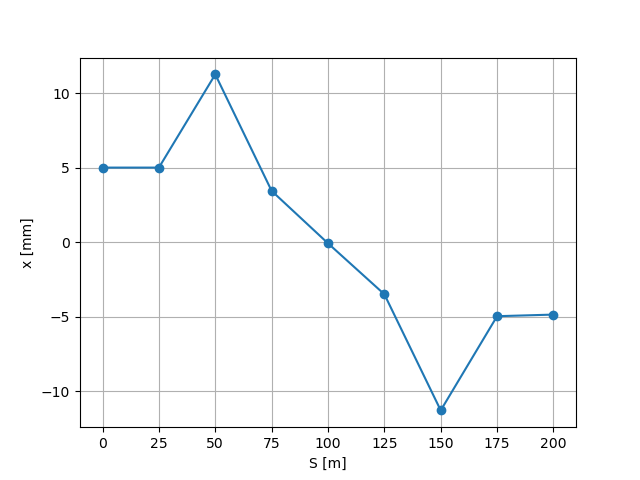

Text(0.5, 0, 'S [m]')

In [160]:
#Defining some variables, these will be used later
F = 20 # initial: 20 meters
L = 25  # initial: 25 meters

# Phase advance
amp = L / (2 * F)
mu1 = 2 * arcsin(amp)
print('mu:', rad2deg(mu1))

#Number of turns and half cells
N_turn  = 1  # inital turns: 1
N_hcell = 8  # inital half cells: 8

# Calculating
nu = (N_hcell * arcsin(L / (2 * F))) / (2 * pi)
print('nu:', nu)

x  = zeros((N_hcell + 1, N_turn))
xp = zeros((N_hcell + 1, N_turn))
s  = zeros((N_hcell + 1, N_turn))

# Initial conditions
x[0, 0] = 5e-3 # initial x displacement: 5 mm
xp[0, 0] = 0    # initial xp angle: 0
s[0, 0] = 0    # initial s position: 0

# Tracking through matrices
for j in range(0, N_turn):
    # Returning to s = 0, start of FODO, initialize a new turn
    if j > 0:
        x[0, j]  = x[-1, j - 1]
        xp[0, j] = xp[-1, j - 1]
        s[0, j]  = 0

    # For each half-cell
    # Note: there are no drift regions!
    for i in range(0, N_hcell):
        # Magnet strength and polarity
        q = (-1)**i / F
        # Next displacement: x
        x[i + 1, j]  = x_new = x[i, j] + L * xp[i, j]
        # Next angle: x prime
        xp[i + 1, j] = xp[i, j] + x_new * q
        # Next position s
        s[i + 1, j]  = s[i, j] + L

# Plotting the data
print('max x value in plot:', max(x[:, 0]) * 1000, 'mm')
close('all')
for p in range(0, N_turn):
    plot(s[:, p], x[:, p] * 1000, 'o-')
ylabel('x [mm]')
xlabel('S [m]')


**Q1) What is the largest displacement the particle attains in the structure?**


**Q2) Where in the FODO structure i.e. at the F, D, or O (drift) does this maximum displacement occur?**

---
- Return $N_{turn}$ to 1. 
- Adjust the focal length, F, until the parameter $\mu$ is 90°. 
- Change the number of half-cells to Ncell= 20. Look at the plot of the trajectory.

**Q3) How many full cells (50 meter units) does it take for the pattern to repeat itself?**


**Q4) For what value of F does $\mu=60^{\circ}$?**


**Q5) How many full cells (50 meter units) does it take for the pattern to repeat itself?  How would you interpret the parameter $\mu$?**


---

The FODO system will be unstable when |TrM| > 2 or when F < L/2. 
- Leaving the other parameters alone, set F = 12.499. 
- Note that the parameter $\mu$ becomes imaginary (and causes a python error)!
- Look at the particle’s trajectory.

**Q6) If the vacuum chamber is 7 centimeters away from the particle’s ideal orbit, how far will the particle travel before it reaches the chamber wall?**

---

## 2. Synchrotron Tune vs. Oscillation Amplitude

The two plots below are a trajectory plot plus a phase space plot. As the particle traverses the FODO structure, its position and angle are kept track of and plotted in the phase space plot. 

For $N_{turn}= 1$, follow and understand how the lines in the two plots are related to one another. For each point in the position plot, find the corresponding point in the phase space plot.
A change in slope on the phase space plot corresponds to a “kink” seen in the trajectory plot, etc.

Hint: to reduce clutter in the phase space plot you can reduce the number of cells `N_hcell` or enable line plotting in the `plot()` command

- Change $N_{turn}$ to 2, 3, 4, 5, 10, and 100 watching the two plots each time. 

**Q7) Print out or make a sketch of this phase space plot and identify with each ellipse its corresponding quadrupole (F or D) and whether it is at the entrance or exit of the magnet.**


mu: 77.36437490697888
nu: 1.7192083312661974
Cells: OFODOFODOFODOFOD


<IPython.core.display.Javascript object>


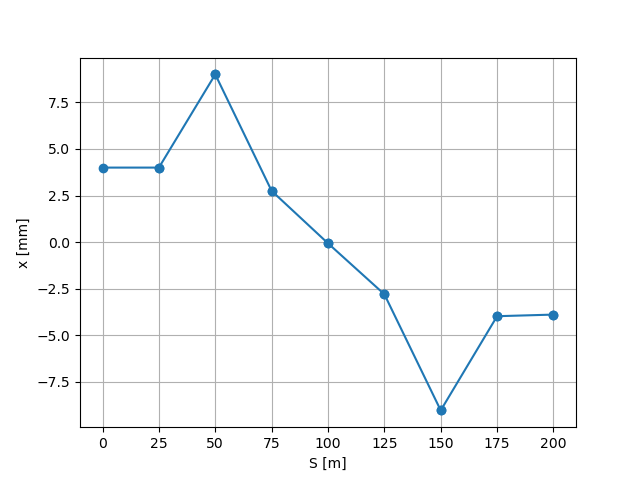

<IPython.core.display.Javascript object>


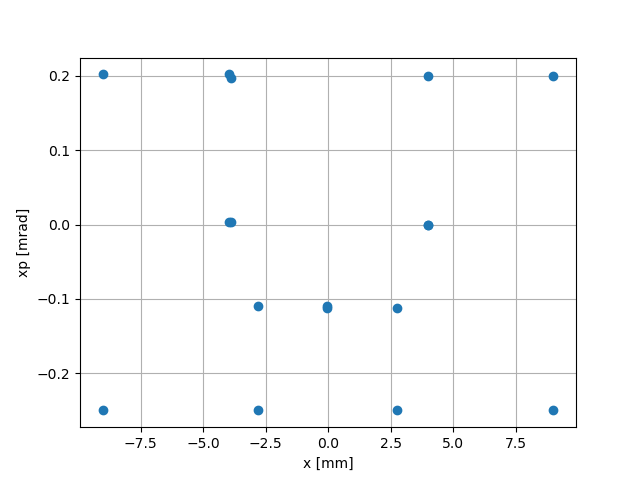

Text(0.5, 0, 'x [mm]')

In [164]:
#Defining some variables, these will be used later
F = 20  # initial = 20 m
L = 25  # initial = 25 m

# Phase advance
amp = L / (2 * F)
mu = 2 * arcsin(amp)
print('mu:', rad2deg(mu))

#Number of turns and half cells
N_turn = 1  # initial turn number = 1
N_hcell = 16  # initial cells = 16

# Calculating
nu2 = (N_hcell * arcsin(L / (2 * F))) / (2 * pi)
print('nu:', nu2)

# Making data holders
x  = zeros((N_hcell + 1, N_turn))
xp = zeros((N_hcell + 1, N_turn))
s  = zeros((N_hcell + 1, N_turn))

# Initial conditions
x[0, 0]  = 0.004  # initial x position = 4 mm
xp[0, 0] = 0      # iniital xp = 0
s[0, 0]  = 0      # initial s position = 0 m

# Tracking through matrices
for j in range(0, N_turn):
    # Setting s back to 0 m (start of FODO)
    if j > 0:
        x[0, j] = x[-1, j - 1]
        xp[0, j] = xp[-1, j - 1]
        s[0, j]  = 0
    
    cells = ''
    for i in range(0, N_hcell):
        if (i % 2) == 0:
            # Even cells are drift regions
            q = 0  # focusing strength
            d = L  # drift length
            cells += 'O'
        else:
            # Odd cells are alternating as Foc. / Defoc. quads
            # so every 4th cell is a Defoc. quad
            if ((i + 1) % 4) == 0:
                q = -1 / F
                cells += 'D'
            else:
                q = 1 / F
                cells += 'F'
            d = 0

        # Calculating x
        x[i + 1, j]  = x_new = x[i, j] + d * xp[i, j]
        # Calculating x prime
        xp[i + 1, j] = xp[i, j] + x_new * q
        # Calculating s
        s[i + 1, j]  = s[i, j] + d

print('Cells:', cells)
        
# Plotting the data
close('all')
figure(1)
for p2 in range(0, N_turn):
    plot(s[:, p2], x[:, p2] * 1000, 'o-')
ylabel('x [mm]')
xlabel('S [m]')

# Phase space
figure(2)
for turn in range(0, N_turn):
    plot(x[:, turn] * 1000, xp[:, turn] * 1000, 'o')
ylabel('xp [mrad]')
xlabel('x [mm]')

---
## 3. Closed Orbit Error & Correction

Today’s final exercise will be to look at how we can correct for a local orbit distortion. 

In this FODO lattice, F = 20 meters, L  = 25 and at specific locations in the structure (initially position ‘10’), there is an additional element –a steering magnet –which gives the particle an angular deflection of amount $\theta$ each time the particle passes by. By looking at the plot of particle displacement, we see that when the particle starts with x = 0 and x’ = 0, it begins a betatron oscillation when it passes by the steering magnet (see the SOLID trace in the plot).

However, there is a particular orbit which, if the particle trajectory starts out just right, the orbit will be deflected by the steering magnet but when it returns to the beginning of the accelerator will end up with the same position and slope it started out with. Thus, this particular particle will follow the same path over and over again. 
- Change $N_{turn}$ from 1 to 2, 5, 10, 100. 
- Notice how the particle appears to oscillate about the new closed orbit generated by the steering magnet. 

Even though the magnet only steers the particle at one location in the accelerator, it can affect the displacement everywhere. If F and L are in meters, x in millimeters, and x’ in mrad, then $\theta$ is in mrad (0.05 initially).

nu:  2.149010414082747


<IPython.core.display.Javascript object>


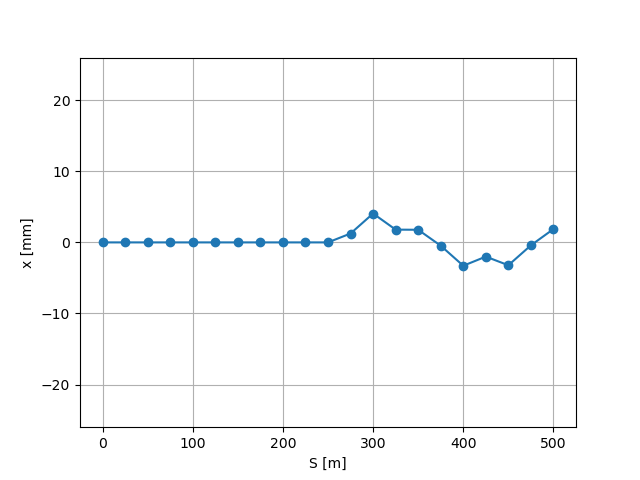

(-26.0, 26.0)

In [161]:
F = 20  # initial = 20 m
L = 25  # initial = 25 m

# Locations of the correctors
z1 = 10  # initial = 10 th element
z2 = 14  # initial = 14 th element
z3 = 16  # initial = 16 th element

#Number of turns and half cells
N_turn = 1  # initial = 1
N_hcell = 20  # initial = 20

#Angles in radians
theta_1 = 0.05e-3  # initial = 0.05 mrad
theta_2 = 0   # initial = 0 mrad
theta_3 = 0   # initial = 0 mrad

# Calculating
nu = (N_hcell * arcsin(L / (2 * F))) / (2 * pi)
print('nu: ', nu)
x  = zeros((N_hcell + 1, N_turn))
xp = zeros((N_hcell + 1, N_turn))
s  = zeros((N_hcell + 1, N_turn))

# Initial conditions
x[0, 0]  = 0  # initial x position = 0 m
xp[0, 0] = 0  # initial xp = 0 mrad

# Tracking through matrices
for j in range(0, N_turn):
    # Setting s back to 0 m (start of FODO)
    if j > 0:
        x[0, j]  = x[-1, j - 1]
        xp[0, j] = xp[-1, j - 1]
        s[0, j]  = 0
    for i in range(0, N_hcell):
        # magnet strength and polarity
        q = (-1)**i / F
        # Calculating x
        x[i + 1, j] = x_new = x[i, j] + L * xp[i, j]
        # Calculating x prime
        if i == z1 - 1:
            theta = theta_1
        elif i == z2 - 1:
            theta = theta_2
        elif i == z3 - 1:
            theta = theta_3
        else:
            theta = 0
        xp[i + 1, j] = xp[i, j] + x_new * q + theta
        # Calculating s
        s[i + 1, j] = s[i, j] + L

# Plotting the data
close('all')
for j in range(0, N_turn):
    plot(s[:, j], x[:, j] * 1000, '-o')
ylabel('x [mm]')
xlabel('S [m]')
ylim(-26, 26)

**Q8) What steering error, $\theta_1$ would generate a ~25 mm (1 inch) maximum displacement of the close orbit in the beam pipe?**


---
In addition to a steering “error” being defined at z1 two steering correctors are defined at locations z2 and z3. These two are initially set to zero, and the trajectory is plotted. 
- Carefully adjust the strengths of these two correctors (theta_2, and theta_3) so that a particle whose trajectory starts with x = 0, x’ = 0 before $\theta_1$ ends up with x = 0 and x’ = 0 after $\theta_3$. Check the “closure” of your “orbit bump” by changing $N_{turn}$ to some large value and seeing that the orbit indeed repeats itself.

**Q9) For $\theta_1=0.05$, what values of $\theta_2$ and $\theta_3$ are required to bring the trajectory back to x = 0 and x' = 0?**
